In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statistics as st
%matplotlib inline

In [2]:
from scipy import stats
from scipy.stats import norm

In [8]:
df=pd.read_csv('melb_data.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [50]:
df.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [51]:
df=df.dropna()
df.isna().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

1. Untuk feature/column Landsize & Price, hitung dan beri penjelasan (insight) terkait:
* Titik Pusat Data (Central Tendency)
* Persebaran Data (Dispersion)
* Distribusi Data (Distribution)

* Titik Pusat Data (Central Tendency)

In [52]:
ls_mean= df['Landsize'].mean()
p_mean= df['Price'].mean()
print('rata-rata dari landsize adalah', ls_mean, 'dan rata-rata dari price adalah', p_mean)

# untuk mengetahui rata-rata landsize digunakan method .mean(). 


rata-rata dari landsize adalah 471.00693996126535 dan rata-rata dari price adalah 1068828.202065849


In [53]:
ls_med=df['Landsize'].median()
p_med=df['Price'].median()
print('median dari landsize adalah', ls_med, 'dan median dari price adalah', p_med)
# untuk mengetahui median landsize digunakan method .median(). 

median dari landsize adalah 373.0 dan median dari price adalah 880000.0


In [54]:
ls_mod=df['Landsize'].mode()
p_mod=df['Price'].mode()
print('modus dari landsize adalah', ls_mod, 'dan modus dari price adalah', p_mod)

# untuk mengetahui median landsize digunakan method .mode(). 

modus dari landsize adalah 0    0.0
dtype: float64 dan modus dari price adalah 0    600000.0
dtype: float64


* Persebaran Data (Dispersion)

In [55]:
ls=df['Landsize'].var()
p=df['Price'].var()

print('varian dari landsize adalah', ls, 'dan varian dari price adalah', p)

# untuk mendapatkan nilai dari varian digunakan method .var()

varian dari landsize adalah 805416.2880874233 dan varian dari price adalah 455836201596.7061


In [36]:
ls=df['Landsize'].std()
p=df['Price'].std()

print('standar deviasi dari landsize adalah', ls, 'dan standar deviasi dari price adalah', p)

#untuk menentukan persebaran data biasanya lebih sering digunakan std dibandingkan dengan varian, karena std merupakan hasil dari pangkat dua varian dengan begitu hasilnya lebih mudah untuk dibandingkan dengan data yang ada.
# pada landsize diketahui bahwa nilai std yaitu 3990.6692411090344 yang dapat diartikan persebaran datanya luas dan standar deviasi dari price adalah 639310.7242960194 yang dapat diartikan juga persebaran tidak terlalu besar karena kurang dri mean

standar deviasi dari landsize adalah 3990.6692411090344 dan standar deviasi dari price adalah 639310.7242960194


* Distribusi Data (Distribution)

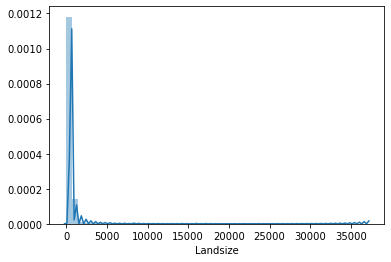

In [56]:
sns.distplot(df['Landsize'])

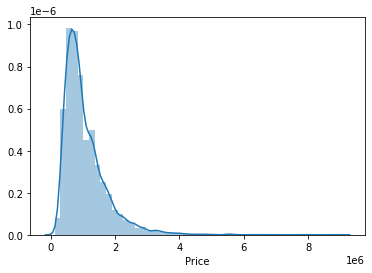

In [57]:
sns.distplot(df['Price'])

In [58]:
ls=stats.skew(df['Landsize'])
p=stats.skew(df['Price'])

print('niali skewness dari landsize adalah', ls, 'dan nilai skewness dari price adalah', p)

#berdasarkan data tersebut diketahui bahwa landsize dan price tidak terdistribusi secara normal apabila dilihat dari skewnessnya. price memiliki bentuk kurtosis positif sementara landsize berbentuk kurtosis negatif

niali skewness dari landsize adalah 18.834378556740738 dan nilai skewness dari price adalah 2.4747899470275407


In [59]:
ls=stats.kurtosis(df['Landsize'])
p=stats.kurtosis(df['Price'])

print('niali kurtosis dari landsize adalah', ls, 'dan nilai kurtosis dari price adalah', p)

#dapat di ambil kesimpulan kedua data tersebut memiliki pentuk kurtosis yg lancip

niali kurtosis dari landsize adalah 572.5300667362405 dan nilai kurtosis dari price adalah 12.222489306888262


2. Carilah data outlier dan beri penjelasan (insight) pada feature/column Distance ! Tambahkan plot untuk menampilkan adanya data outlier!

In [60]:
def pencilan(x):
    iqr=x.describe().loc['75%']-x.describe().loc['25%']

    low_lim = x.describe().loc['25%']-1.5*iqr 
    up_lim = x.describe().loc['75%']+1.5*iqr
    # print('Batas bawah', low_lim)
    # print('Batas atas', up_lim)

    outlier =[] 
    for i in x: 
        if (i> up_lim) or (i<low_lim): 
            outlier.append(i)

    return outlier

len(pencilan(df['Distance']))

#untuk mencari benayaknya outlier atau penclan kita dapat membuat fungsi
# dimana diketahui iqr adalah q3 dn q1 dari data tersebut
# selanjutnya kita membuat whisker atas dan wishker bawah dengan cara q1 - 1.5 iqr untuk wisher bawah dan q3 + 1.5 iqr untuk wishker atas

# selanjutnya untuk mencari outlier yang berarti data yang berada diluar kedua wishker tersebut digunakan for loop dan if.
# dimana apabila i>wishker atas atau i<wishker bawah
# apabila ada data yang sesuai syarat maka masukkan ke list outlier
# lalu return outlier
# untuk mengetahui jumlah outlier kita menggunakan method len karnea kita ingin menghitung berapa banyak data yang masuk kedalam outlier.

204

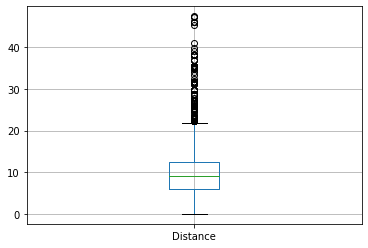

In [61]:
df.boxplot('Distance')

#dari boxplot tersebut dapat diketahui bahwa nilai outlier berada di atas wishker atas, yang berarti banyak jarak yang lebih besar dibandingkan dengan nilai central tendency nya

3. Tampilkan distribusi (sebaran data) dalam bentuk plot yang tepat, untuk feature/column YearBuilt. Jelaskan insight apa yang Anda dapatkan di setiap plot tersebut!

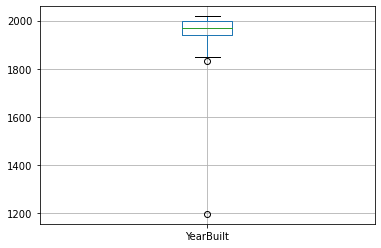

In [67]:
df.boxplot('YearBuilt')

# untuk melihat distribusi saya menggunakan boxplot dimana pada boxplot data disajikan dengan lebih jelas kaena ada wishker, selain itu penggunaan histogram lebih baik apabila datanya adalah data numerik bukan kategorical
# data visualisasi tersebut dapat diketahui rumah di australia lebih bnayak rumah yang beruisia tua dibandingkan dengan rumah yang baru dibangun


4. Tampilkan perkembangan rata-rata harga (Price) rumah berdasarkan tahun pembangunan rumah (Year) menggunakan plot yang tepat! Jelaskan (insight) perkembangan rata-rata harga rumah dari plot yang Anda buat!

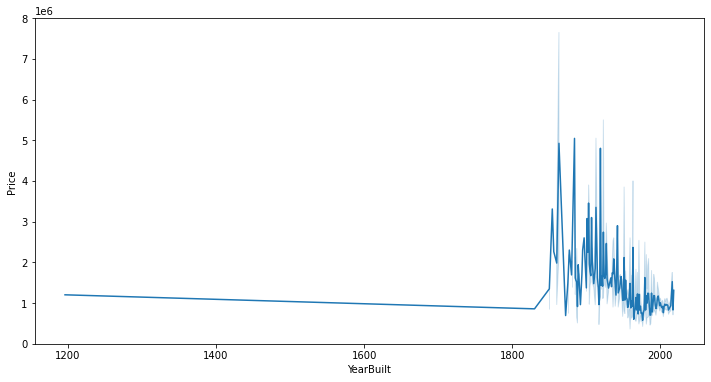

In [71]:
plt.figure(figsize=(12,6))
sns.lineplot(x='YearBuilt', y='Price', data=df)

#untuk data perkembangan visualisasi yang terbaik adalah dengan menggunakan lineplot
# dari visualisasi tersebut diketahui bahwa harga rumah cenderung berfluktuasi
# dapat dilihat bahwa harga rumah tahun 1200-1800 memiliki harga yang cenderung stabil dan lebih murah dibandingkan harga rumah pada tahun 1900an. hal ini mungkin bisa terjadi karena keadaan rumah yang sudah tidak lagi baik dan butuh banyak perbaikan
# semenjak tahun 1900an harga rumah mulai meningkat dan berfluktuasi. hal ini mungkin saja terjadi dikarenakan masih baiknya bangunan rumah
# semakin mendekati tahun 2000-now harga rumah semakin berfluktuasi, hal ini bisa saja terjadi karena adanya perbedaan bentuk dan ukuran rumah yang disesuaikan dengan kebutuhan masyarakat. yang mana biasanya semakin kecil rumah akan semakin murah juga harganya

5. Di antara Landsize, Distance, & Rooms, manakah feature/column yang memiliki nilai korelasi tertinggi pada feature/column Price? Jelaskan metode korelasi apa yang Anda gunakan, serta apa insight untuk perusahaan setelah mengetahui nilai korelasi tersebut?

In [73]:
df.corr(method='spearman')['Price']

# metode yang digunakan adaah spearman karena spearman digunakan untuk variabel yang tidak terdistribusi secara normal
# untuk vaiabel yang memiliki korelasi terkuat dengan price adalah variabel rooms, diamana memiliki nilai koreasi sebesar 0.591448 meskipun dalam statistik nilai korelasi tersebut dikatakan rendah, tetapi apabila dibandingkan dengan variabel lainnya, variabel rooms merupakan variabel dengan korelasi terbesar dengan price. 
# sementara variabel Distance memiliki nilai korelaso sebesar -0.117274, yang berarti memiiki hubungan negatif dengan harga rumah. 
# untuk variabel Landsize memiliki nilai korelasi 0.365473 yang lebih rendah dibandingkan dengan rooms


# dapat diambil kesimpulan bahwa semakin banyak room yang tersedia harga rumah akan semakin mahal


Rooms            0.591448
Price            1.000000
Distance        -0.117274
Postcode         0.227997
Bedroom2         0.574098
Bathroom         0.477049
Car              0.303794
Landsize         0.365473
BuildingArea     0.666623
YearBuilt       -0.365789
Lattitude       -0.255574
Longtitude       0.267049
Propertycount   -0.025932
Name: Price, dtype: float64

6. Temukan RegionName yang rata-rata harga (Price) propertinya paling tinggi, serta tampilkan RegionName dan rata-rata harga rumah dalam bentuk Barplot! Lalu, di region yang memiliki rata-rata harga properti tertinggi, carilah:
* Lima CouncilArea yang memiliki rata-rata harga rumah tertinggi!
* Tipe properti (Type) yang memiliki rata-rata harga rumah tertinggi!
* Metode penjualan properti (Method) yang paling sering dilakukan!

In [126]:
df.groupby('Regionname').mean().Price.sort_values(ascending=True)

#digroupby dulu, abis itu di mean, lalu pricenya di sort value berdasarkan terbesar

Regionname
Western Victoria              3.910714e+05
Northern Victoria             5.568947e+05
Eastern Victoria              6.699992e+05
Western Metropolitan          8.675011e+05
Northern Metropolitan         8.722635e+05
South-Eastern Metropolitan    9.304847e+05
Eastern Metropolitan          1.110341e+06
Southern Metropolitan         1.378654e+06
Name: Price, dtype: float64

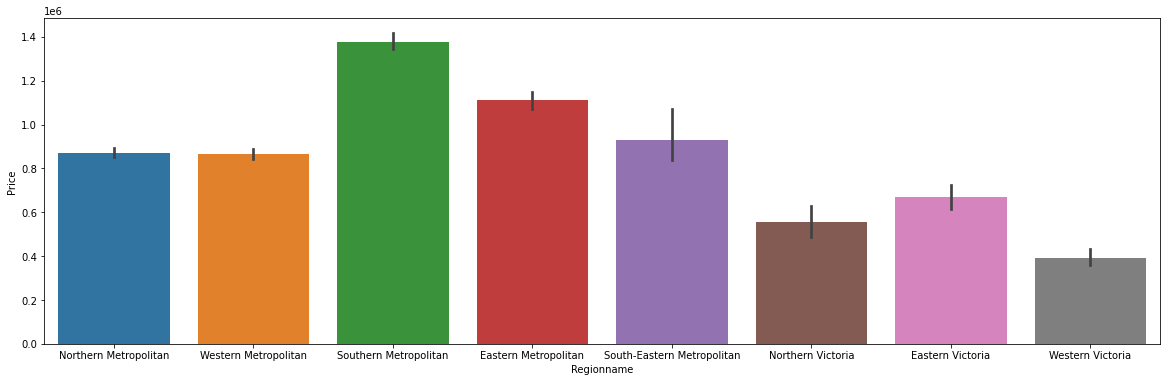

In [88]:
plt.figure(figsize=(20,6))
sns.barplot(x='Regionname', y='Price', data=df)

In [ ]:
# berdasarkan tabel diatas diketahui bahwa region yang memiliki harga tertinggi berada di daerah South-Eastern Metropolitan dengan rata-rata harga 9.304847e+05

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6196 entries, 1 to 12212
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         6196 non-null   object 
 1   Address        6196 non-null   object 
 2   Rooms          6196 non-null   int64  
 3   Type           6196 non-null   object 
 4   Price          6196 non-null   float64
 5   Method         6196 non-null   object 
 6   SellerG        6196 non-null   object 
 7   Date           6196 non-null   object 
 8   Distance       6196 non-null   float64
 9   Postcode       6196 non-null   float64
 10  Bedroom2       6196 non-null   float64
 11  Bathroom       6196 non-null   float64
 12  Car            6196 non-null   float64
 13  Landsize       6196 non-null   float64
 14  BuildingArea   6196 non-null   float64
 15  YearBuilt      6196 non-null   float64
 16  CouncilArea    6196 non-null   object 
 17  Lattitude      6196 non-null   float64
 18  Longtit

In [125]:
df.groupby('CouncilArea').mean().Price.sort_values(ascending=True).head()

# counci area Macedon Ranges merupakan yg termahal
#digroupby dulu, abis itu di mean, lalu pricenya di sort value berdasarkan terbesar setelah itu head buat 5 teratas

CouncilArea
Melton            520544.047619
Wyndham           522223.404255
Hume              557417.525773
Cardinia          615700.000000
Macedon Ranges    615800.000000
Name: Price, dtype: float64

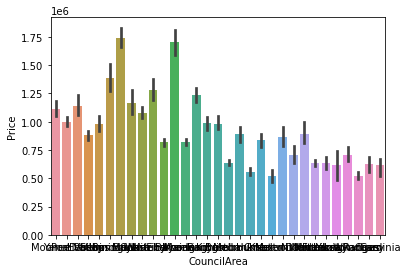

In [129]:
sns.barplot(x='CouncilArea', y='Price', data=df)

In [124]:
df.groupby('Type').mean().Price.sort_values(ascending=True).head()
# type t adalah type rumah dgn ratataya termahal
#digroupby dulu, abis itu di mean, lalu pricenya di sort value berdasarkan terbesar

Type
u    5.883745e+05
t    8.841816e+05
h    1.273016e+06
Name: Price, dtype: float64

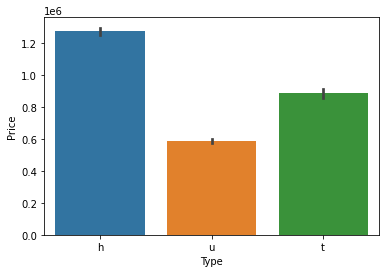

In [131]:
sns.barplot(x='Type', y='Price', data=df)

In [127]:
df['Method'].value_counts()
#mengguakan vaue count
#penjualan properti lebih sering menggunakan metode s

S     3957
SP     898
PI     757
VB     543
SA      41
Name: Method, dtype: int64

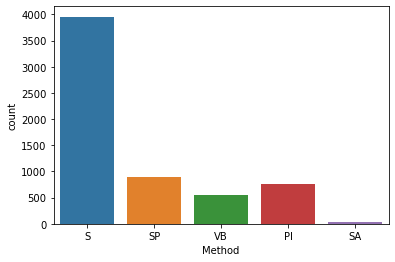

In [130]:
sns.countplot(x='Method', data=df)

7. Lakukan Uji Hipotesis untuk menguji apakah ada perbedaan harga properti antar Region Name! (Anggap Price memiliki distribusi normal)

In [136]:
df.groupby('Regionname').count()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Propertycount
Regionname,,,,,,,,,,,,,,,,,,,,
Eastern Metropolitan,571,571,571,571,571,571,571,571,571,571,571,571,571,571,571,571,571,571,571,571
Eastern Victoria,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23
Northern Metropolitan,1854,1854,1854,1854,1854,1854,1854,1854,1854,1854,1854,1854,1854,1854,1854,1854,1854,1854,1854,1854
Northern Victoria,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19
South-Eastern Metropolitan,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157
Southern Metropolitan,2166,2166,2166,2166,2166,2166,2166,2166,2166,2166,2166,2166,2166,2166,2166,2166,2166,2166,2166,2166
Western Metropolitan,1392,1392,1392,1392,1392,1392,1392,1392,1392,1392,1392,1392,1392,1392,1392,1392,1392,1392,1392,1392
Western Victoria,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14


In [138]:
stats.f_oneway(df[df['Regionname']=='Eastern Metropolitan']['Price'], df[df['Regionname']=='Eastern Victoria']['Price'], df[df['Regionname']=='Northern Metropolitan']['Price'], df[df['Regionname']=='Northern Victoria']['Price'], df[df['Regionname']=='South-Eastern Metropolitan']['Price'], [df['Regionname']=='Southern Metropolitan']['Price'], [df['Regionname']=='Western Metropolitan']['Price'], [df['Regionname']=='Western Victoria']['Price'], 
)

TypeError: list indices must be integers or slices, not str

In [ ]:
df[df['Regionname']=='Eastern Metropolitan']['Price'], df[df['Regionname']=='Eastern Victoria']['Price'], df[df['Regionname']=='Northern Metropolitan']['Price'], df[df['Regionname']=='Northern Victoria']['Price'], df[df['Regionname']=='South-Eastern Metropolitan']['Price'], [df['Regionname']=='Southern Metropolitan']['Price'], [df['Regionname']=='Western Metropolitan']['Price'], [df['Regionname']=='Western Victoria']['Price'], 
